In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the final dataset (after cleaning)

df = pd.read_csv('Data/final_df.csv')

# Part One: Analyzing the music itself

<AxesSubplot: xlabel='year', ylabel='speechiness'>

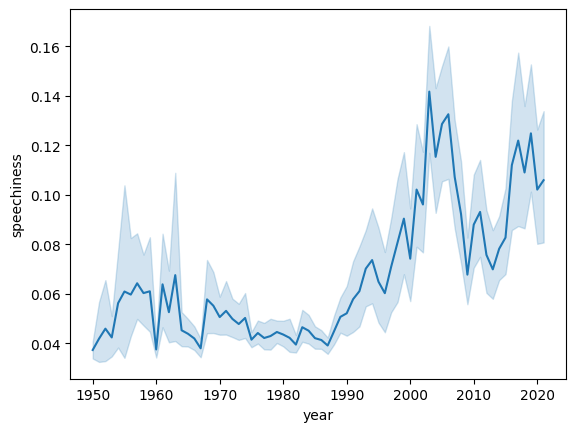

In [2]:
# We will start by analyzing speechiness

df_speechiness = df[['year' , 'title', 'artist' , 'speechiness']]

sns.lineplot(data=df_speechiness, x="year", y="speechiness")

<AxesSubplot: xlabel='year', ylabel='instrumentalness'>

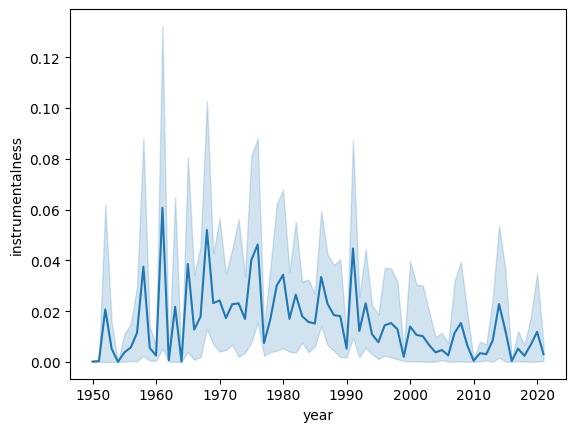

In [3]:
# Instrumentalness

df_instrumentalness = df[['year' , 'title', 'artist' , 'instrumentalness']]

sns.lineplot(data=df_instrumentalness, x="year", y="instrumentalness")

<AxesSubplot: xlabel='year', ylabel='duration_ms'>

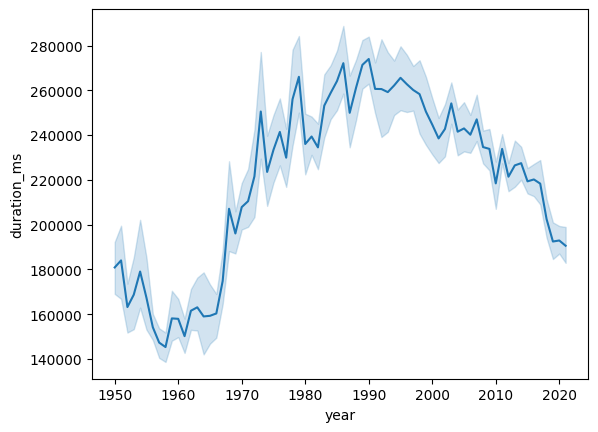

In [4]:
df_duration = df[['year' , 'title', 'artist' , 'duration_ms']]

sns.lineplot(data=df_duration, x="year", y="duration_ms")

<AxesSubplot: xlabel='year', ylabel='danceability'>

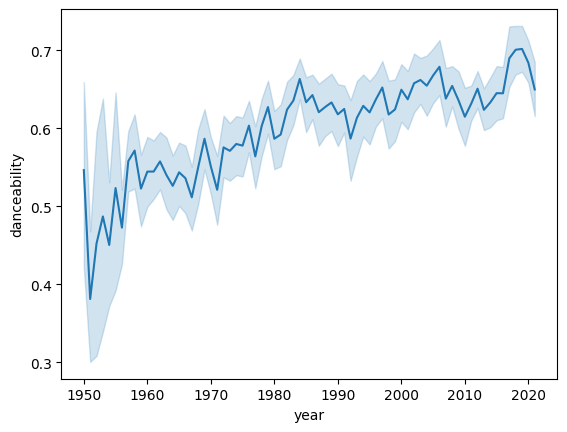

In [5]:
df_danceability = df[['year' , 'title', 'artist' , 'danceability']]

sns.lineplot(data=df_danceability, x="year", y="danceability")

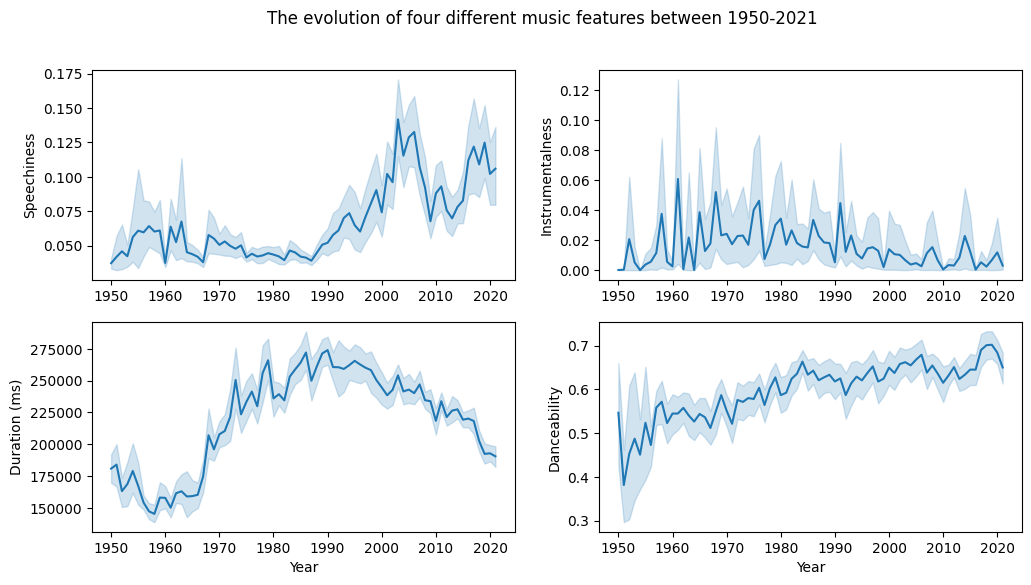

In [6]:
fig, axs = plt.subplots(2 , 2, figsize=(12, 6))
ax1 = sns.lineplot(data=df_speechiness, x="year", y="speechiness" , ax=axs[0,0])
ax2 = sns.lineplot(data=df_instrumentalness, x="year", y="instrumentalness" , ax=axs[0,1])
ax3 = sns.lineplot(data=df_duration, x="year", y="duration_ms", ax=axs[1,0])
ax4 = sns.lineplot(data=df_danceability, x="year", y="danceability", ax=axs[1,1])
ax1.set(xlabel = "" , ylabel = "Speechiness")
ax2.set(xlabel = "" , ylabel = "Instrumentalness")
ax3.set(xlabel = "Year" , ylabel = "Duration (ms)")
ax4.set(xlabel = "Year" , ylabel = "Danceability")
fig.suptitle("The evolution of four different music features between 1950-2021" , )
fig.savefig("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/musicfeatures.png")

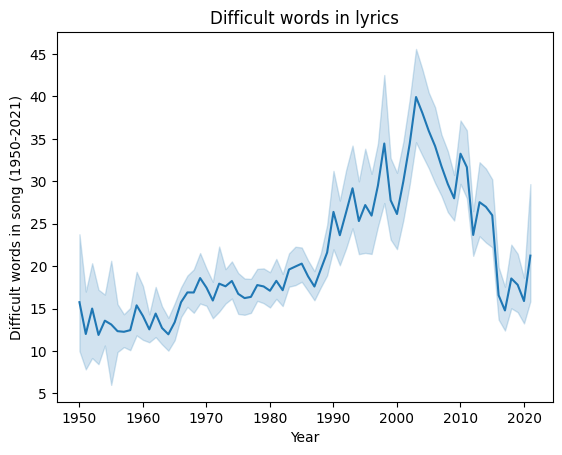

In [7]:
# Plotting difficult words 
from turtle import title


df_difficult_words = df[['year' , 'title', 'artist' , 'difficult_words' ]]
ax = sns.lineplot(data=df_difficult_words, x="year", y="difficult_words")
ax.set(title = "Difficult words in lyrics" , xlabel = "Year" , ylabel = "Difficult words in song (1950-2021)")
plt.savefig("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/difficult_words.png")
 

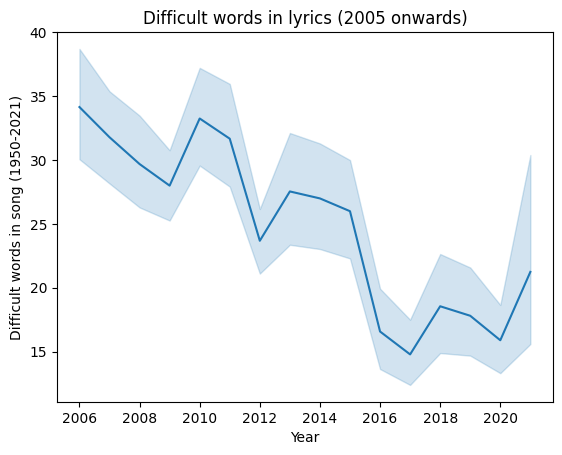

In [8]:
# Zoom into the decline in difficult words (around 2005)
x = df_difficult_words[df_difficult_words['year'] > 2005]
ax = sns.lineplot(data=x, x="year", y="difficult_words")
ax.set(title = "Difficult words in lyrics (2005 onwards)" , xlabel = "Year" , ylabel = "Difficult words in song (1950-2021)")
plt.savefig("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/difficult_words_2005>.png")

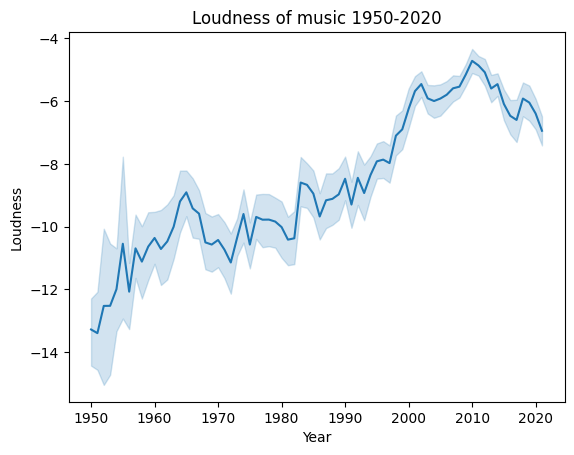

In [9]:
#Loudness
df_loudness = df[['year' , 'title', 'artist' , 'loudness' ]]

ax = sns.lineplot(data=df_loudness, x="year", y="loudness")
ax.set(title = "Loudness of music 1950-2020" , xlabel= "Year" , ylabel= "Loudness")
fig.savefig("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/Loudness.png")
plt.savefig("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/music_loudness.png")

# Part Two: Genre analysis

In [10]:
# The main goal of this section is to understand how band genres have changed over the decades
genres = pd.read_csv('Data/features_dataset.csv')
genres = genres.drop_duplicates(subset=['artist'])
genres = df.merge(genres, on='artist', how='left')
genres = genres.dropna()[['year' , 'main_genre']]

# Split into decades 
genres_50s = genres[(genres['year'] >= 1950) & (genres['year'] < 1960)]
genres_60s = genres[(genres['year'] >= 1960) & (genres['year'] < 1970)]
genres_70s = genres[(genres['year'] >= 1970) & (genres['year'] < 1990)]
genres_80s = genres[(genres['year'] >= 1980) & (genres['year'] < 1990)]
genres_90s = genres[(genres['year'] >= 1990) & (genres['year'] < 2000)]
genres_00s = genres[(genres['year'] >= 2000) & (genres['year'] < 2010)]
genres_2010s = genres[(genres['year'] >= 2010)]

In [11]:
genres_50s = pd.DataFrame(genres_50s['main_genre'].value_counts()).reset_index()
genres_60s = pd.DataFrame(genres_60s['main_genre'].value_counts()).reset_index()
genres_70s = pd.DataFrame(genres_70s['main_genre'].value_counts()).reset_index()
genres_80s = pd.DataFrame(genres_80s['main_genre'].value_counts()).reset_index()
genres_90s = pd.DataFrame(genres_90s['main_genre'].value_counts()).reset_index()
genres_00s = pd.DataFrame(genres_00s['main_genre'].value_counts()).reset_index()
genres_2010s = pd.DataFrame(genres_2010s['main_genre'].value_counts()).reset_index()

In [12]:
# Create columns that give the % distribution of bands within the decade. This is necessary to have a stacked bar chart of multiple decades, as each decade hs a different number of bands

genres_50s['Distribution (%) '] = (np.round((genres_50s['main_genre']/sum(genres_50s['main_genre']))*100 , 0)).astype('int')
genres_60s['Distribution (%) '] = (np.round((genres_60s['main_genre']/sum(genres_60s['main_genre']))*100 , 0)).astype('int')
genres_70s['Distribution (%) '] = (np.round((genres_70s['main_genre']/sum(genres_70s['main_genre']))*100 , 0)).astype('int')
genres_80s['Distribution (%) '] = (np.round((genres_80s['main_genre']/sum(genres_80s['main_genre']))*100 , 0)).astype('int')
genres_90s['Distribution (%) '] = (np.round((genres_90s['main_genre']/sum(genres_90s['main_genre']))*100 , 0)).astype('int')
genres_00s['Distribution (%) '] = (np.round((genres_00s['main_genre']/sum(genres_00s['main_genre']))*100 , 0)).astype('int')
genres_2010s['Distribution (%) '] = (np.round((genres_2010s['main_genre']/sum(genres_2010s['main_genre']))*100 , 0)).astype('int')

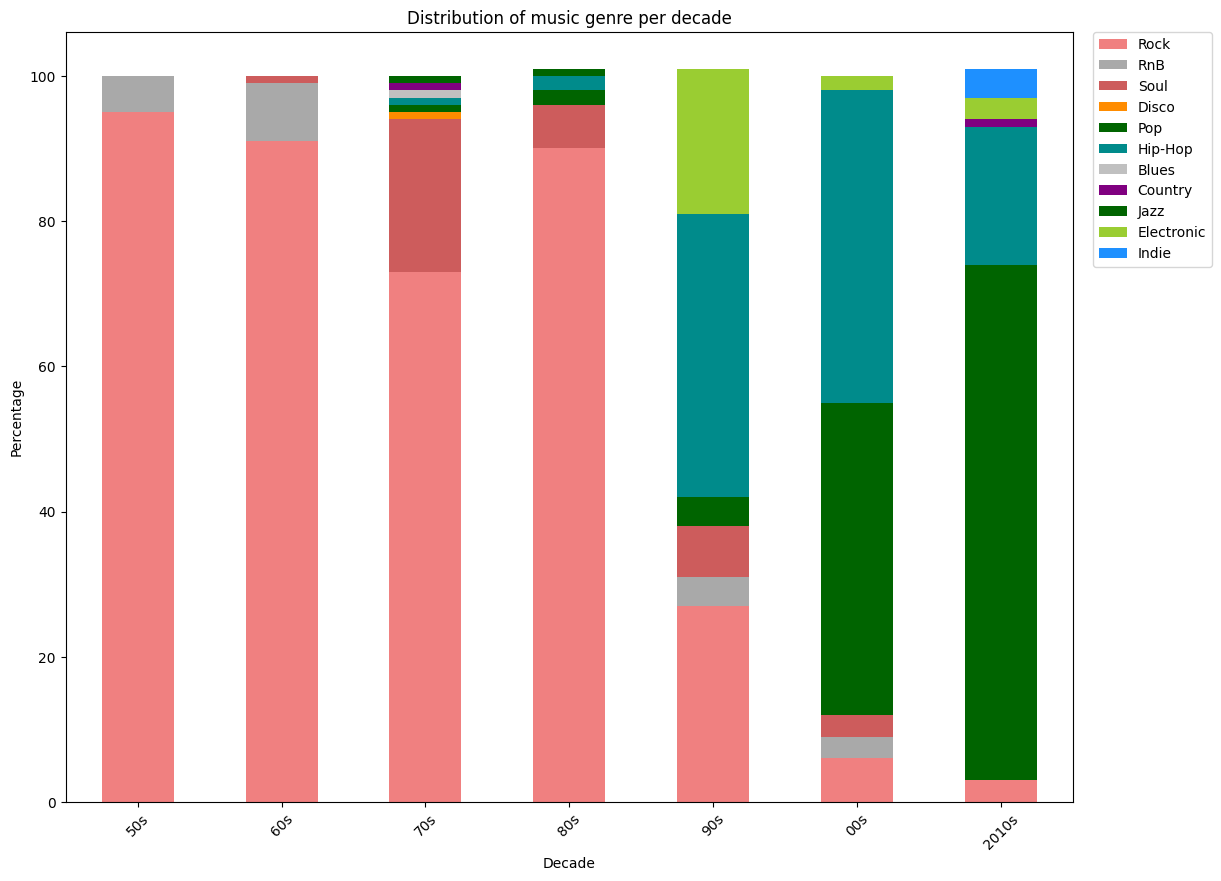

In [13]:
# Use the above results to create a dataframe that could be used for the stacked bar chart (Some of this is done manually and cannnot be replicated line by line for other datasets)

from curses import def_prog_mode


df_genres= pd.DataFrame({'Genre': ['Rock' , 'RnB' , "Soul", "Disco", "Pop", "Hip-Hop", "Blues", "Country", "Jazz", "Electronic", "Indie"] , 
'50s' : [95,5,0,0,0,0,0,0,0,0,0] , 
'60s':  [91,8,1,0,0,0,0,0,0,0,0],
'70s':  [73,0,21,1,1,1,1,1,1,1,1],
"80s":  [86,0,7,0,2,2,0,0,1,0,0],
"90s":  [27,4,7,0,4,39,0,0,0,20,0],
"00s":  [6,2,2,0,46,43 ,0,0,0,2,0],
"2010s":[3,0,0,0,71,19,0,1,0,2,3] })


df_genres2= pd.DataFrame({'Decade': ['50s' , '60s' , "70s", "80s", "90s", "00s", "2010s"] , 
'Rock' :     [95,91,73, 90, 27, 6, 3], 
'RnB':       [5,8,0,0,4,3,0],
'Soul':      [0,1,21,6,7,3,0],
"Disco":     [0,0,1,0,0,0,0],
"Pop":       [0,0,1,2,4,43, 71],
"Hip-Hop":   [0,0,1,2,39,43,19],
"Blues":     [0,0,1,0,0,0,0],
"Country":   [0,0,1,0,0,0,1],
"Jazz":      [0,0,1,1,0, 0, 0],
"Electronic":[0,0,0,0,20,2,3],
"Indie":     [0,0,0,0,0,0,4]

})
 


df_genres2.plot(kind='bar', stacked=True, color=['lightcoral', 'darkgrey', 'indianred' , 'darkorange', 'darkgreen' ,
 'darkcyan', 'silver', 'purple', 'darkgreen', 'yellowgreen', 'dodgerblue'], figsize=(13,10))
 # Add Title and Labels
plt.title('Distribution of music genre per decade')
plt.xlabel('Decade')
plt.ylabel('Percentage')
x = [0 ,1, 2, 3, 4, 5, 6]
labels = ['50s', '60s', '70s', '80s', '90s', '00s' , '2010s']
plt.xticks(x, labels, rotation = 45)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/genre_evolution.png")


 

# Part Three: Lyrics Analysis

In [14]:
new_data = pd.read_csv('Data/final_df.csv')


# Keep only the following columns: lyrics (for analysis), year, and title

lyric_data = new_data[['title' , 'lyrics' , 'year']]

lyric_data_50s =lyric_data[(lyric_data['year'] > 1950) & (lyric_data['year'] <1960)].reset_index()
lyric_data_60s = lyric_data[(lyric_data['year'] > 1960) & (lyric_data['year'] <1970)].reset_index()
lyric_data_70s = lyric_data[(lyric_data['year'] > 1970) & (lyric_data['year'] <1980)].reset_index()
lyric_data_80s = lyric_data[(lyric_data['year'] > 1980) & (lyric_data['year'] <1990)].reset_index()
lyric_data_90s = lyric_data[(lyric_data['year'] > 1990) & (lyric_data['year'] <2000)].reset_index()
lyric_data_00s = lyric_data[(lyric_data['year'] > 2000) & (lyric_data['year'] <2010)].reset_index()
lyric_data_2010s = lyric_data[(lyric_data['year'] > 2010)].reset_index()

In [15]:
# Keep this cell for later to improve word cloud design 
# Create maskable images for the word clouds 
#from PIL import Image

#mask = np.array(Image.open("/Users/anthonymoubarak/Desktop/pngwing.com.png"))


#def transform_zeros(val):
    #if val == 0:
        #return 255
   # else:
        #return val

#maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
    
#for i in range(len(mask)):
   # maskable_image[i] = list(map(transform_zeros, mask[i]))


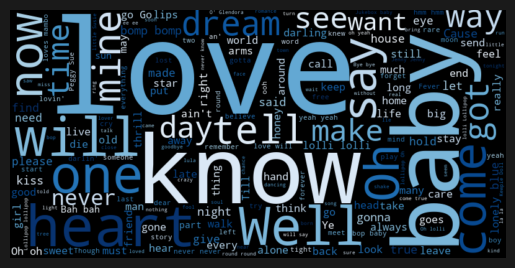

In [351]:
from wordcloud import WordCloud 

text = " ".join(review for review in lyric_data_50s.lyrics.astype(str)).replace("\n" , " ")
wordcloud1 = WordCloud(background_color="black", width=800, height=400, colormap= "Blues" ).generate(text)
plt.figure( facecolor='#1A1A1A' )
plt.imshow(wordcloud1, interpolation='bilinear' )
plt.axis("off")
plt.show()
wordcloud1.to_file("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/wordcloud50s.png")


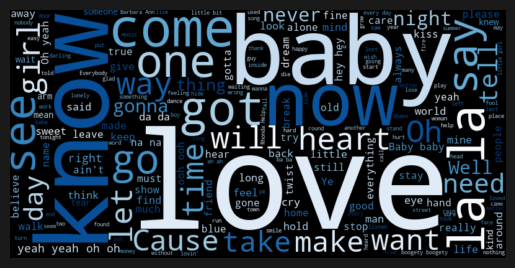

In [313]:
from wordcloud import WordCloud 

text = " ".join(review for review in lyric_data_60s.lyrics.astype(str)).replace("\n" , " ")
wordcloud2 = WordCloud(background_color="black", width=800, height=400, colormap= "Blues" ).generate(text)
plt.figure( facecolor='#1A1A1A' )
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud2.to_file("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/wordcloud60s.png")


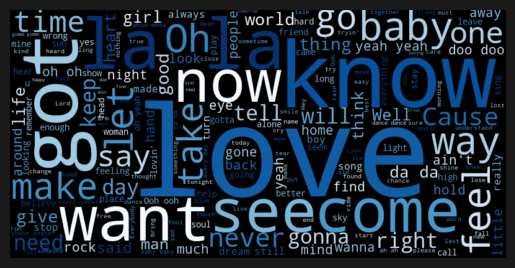

In [314]:
from wordcloud import WordCloud 

text = " ".join(review for review in lyric_data_70s.lyrics.astype(str)).replace("\n" , " ")
wordcloud3 = WordCloud(background_color="black", width=800, height=400, colormap= "Blues" ).generate(text)
plt.figure( facecolor='#1A1A1A' )
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud3.to_file("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/wordcloud70s.png")

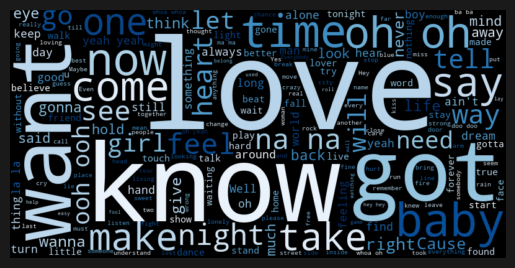

In [315]:
from wordcloud import WordCloud 

text = " ".join(review for review in lyric_data_80s.lyrics.astype(str)).replace("\n" , " ")
wordcloud4 = WordCloud(background_color="black", width=800, height=400, colormap= "Blues" ).generate(text)
plt.figure( facecolor='#1A1A1A' )
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud4.to_file("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/wordcloud80s.png")

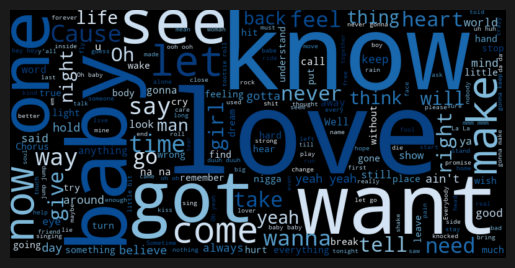

In [316]:
from wordcloud import WordCloud 

text = " ".join(review for review in lyric_data_90s.lyrics.astype(str)).replace("\n" , " ")
wordcloud5 = WordCloud(background_color="black", width=800, height=400, colormap= "Blues" ).generate(text)
plt.figure( facecolor='#1A1A1A' )
plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud5.to_file("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/wordcloud90s.png")

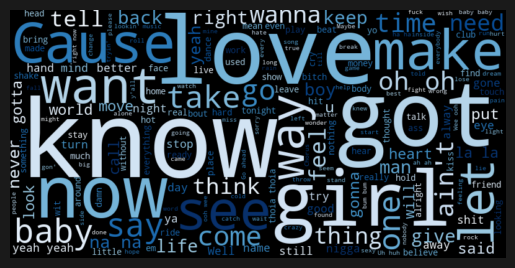

In [317]:
from wordcloud import WordCloud 

text = " ".join(review for review in lyric_data_00s.lyrics.astype(str)).replace("\n" , " ")
wordcloud6 = WordCloud(background_color="black", width=800, height=400, colormap= "Blues" ).generate(text)
plt.figure( facecolor='#1A1A1A' )
plt.imshow(wordcloud6, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud6.to_file("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/wordcloud00s.png")

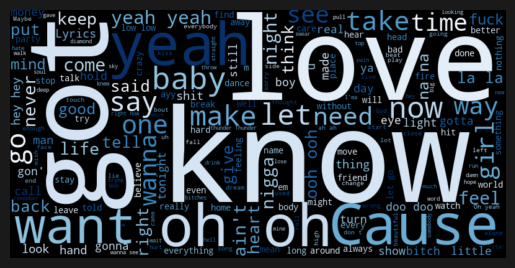

In [318]:
from wordcloud import WordCloud 

text = " ".join(review for review in lyric_data_2010s.lyrics.astype(str)).replace("\n" , " ")
wordcloud7 = WordCloud(background_color="black", width=800, height=400 ,colormap= "Blues" ).generate(text)
plt.figure( facecolor='#1A1A1A' )
plt.imshow(wordcloud7, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud7.to_file("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/wordcloud2010s.png")

In [319]:
# Exploring how the use of profanity and racist words have evolved over the years 

# Bitch counter 

b_count_50s = 0
b_count_60s = 0
b_count_70s = 0
b_count_80s = 0
b_count_90s = 0
b_count_00s = 0
b_count_2010s = 0

for i in  lyric_data_50s.lyrics:

    if (("bitch" in i)):
        b_count_50s += 1

    else:
        continue


for i in  lyric_data_60s.lyrics:

    if (("bitch" in i)):
        b_count_60s += 1

    else:
        continue


for i in  lyric_data_70s.lyrics:

    if (("bitch" in i)):
        b_count_70s += 1

    else:
        continue

for i in  lyric_data_80s.lyrics:

    if (("bitch" in i)):
        b_count_80s += 1

    else:
        continue

for i in  lyric_data_90s.lyrics:

    if (("bitch" in i)):
        b_count_90s += 1

    else:
        continue

for i in  lyric_data_00s.lyrics:

    if (("bitch" in i)):
        b_count_00s += 1

    else:
        continue


for i in  lyric_data_2010s.lyrics:

    if (("bitch" in i)):
        b_count_2010s += 1

    else:
        continue



In [320]:
# N word counter 


n_count_50s = 0
n_count_60s = 0
n_count_70s = 0
n_count_80s = 0
n_count_90s = 0
n_count_00s = 0
n_count_2010s = 0

for i in  lyric_data_50s.lyrics:

    if (("nigga" in i) or ("nigger" in i )):
        n_count_50s += 1

    else:
        continue


for i in  lyric_data_60s.lyrics:

    if (("nigga" in i) or ("nigger" in i )):
        n_count_60s += 1

    else:
        continue


for i in  lyric_data_70s.lyrics:

    if (("nigga" in i) or ("nigger" in i )):
        n_count_70s += 1

    else:
        continue

for i in  lyric_data_80s.lyrics:

    if (("nigga" in i) or ("nigger" in i )):
        n_count_80s += 1

    else:
        continue

for i in  lyric_data_90s.lyrics:

    if (("nigga" in i) or ("nigger" in i )):
        n_count_90s += 1

    else:
        continue

for i in  lyric_data_00s.lyrics:

    if (("nigga" in i) or ("nigger" in i )):
        n_count_00s += 1

    else:
        continue


for i in  lyric_data_2010s.lyrics:

    if (("nigga" in i) or ("nigger" in i )):
        n_count_2010s += 1

    else:
        continue

In [321]:
# F word counter 

# Exploring how the use of profanity and racist words have evolved over the years 

# Bitch counter 

f_count_50s = 0
f_count_60s = 0
f_count_70s = 0
f_count_80s = 0
f_count_90s = 0
f_count_00s = 0
f_count_2010s = 0

for i in  lyric_data_50s.lyrics:

    if (("fuck" in i)):
        f_count_50s += 1

    else:
        continue


for i in  lyric_data_60s.lyrics:

    if (("fuck" in i)):
        f_count_60s += 1

    else:
        continue


for i in  lyric_data_70s.lyrics:

    if (("fuck" in i)):
        f_count_70s += 1

    else:
        continue

for i in  lyric_data_80s.lyrics:

    if (("fuck" in i)):
        f_count_80s += 1

    else:
        continue

for i in  lyric_data_90s.lyrics:

    if (("fuck" in i)):
        f_count_90s += 1

    else:
        continue

for i in  lyric_data_00s.lyrics:

    if (("fuck" in i)):
        f_count_00s += 1

    else:
        continue


for i in  lyric_data_2010s.lyrics:

    if (("fuck" in i)):
        f_count_2010s += 1

    else:
        continue



In [322]:
# Shit counter 

# F word counter 

# Exploring how the use of profanity and racist words have evolved over the years 

# Bitch counter 

s_count_50s = 0
s_count_60s = 0
s_count_70s = 0
s_count_80s = 0
s_count_90s = 0
s_count_00s = 0
s_count_2010s = 0

for i in  lyric_data_50s.lyrics:

    if (("shit" in i)):
        s_count_50s += 1

    else:
        continue


for i in  lyric_data_60s.lyrics:

    if (("shit" in i)):
        s_count_60s += 1

    else:
        continue


for i in  lyric_data_70s.lyrics:

    if (("shit" in i)):
        s_count_70s += 1

    else:
        continue

for i in  lyric_data_80s.lyrics:

    if (("shit" in i)):
        s_count_80s += 1

    else:
        continue

for i in  lyric_data_90s.lyrics:

    if (("shit" in i)):
        s_count_90s += 1

    else:
        continue

for i in  lyric_data_00s.lyrics:

    if (("shit" in i)):
        s_count_00s += 1

    else:
        continue


for i in  lyric_data_2010s.lyrics:

    if (("shit" in i)):
        s_count_2010s += 1

    else:
        continue



In [323]:
# Store the results of the above code in dataframes for visualization purposes 

df_s = pd.DataFrame({'Decade' : ['50s' , '60s', '70s', '80s', '90s' , '00s' , '2010s'] , 'Count': [s_count_50s , s_count_60s, s_count_70s, s_count_80s, s_count_90s, s_count_00s, s_count_2010s]})
df_b = pd.DataFrame({'Decade' : ['50s' , '60s', '70s', '80s', '90s' , '00s' , '2010s'] , 'Count': [b_count_50s , b_count_60s, b_count_70s, b_count_80s, b_count_90s, b_count_00s, b_count_2010s]})
df_n = pd.DataFrame({'Decade' : ['50s' , '60s', '70s', '80s', '90s' , '00s' , '2010s'] , 'Count': [n_count_50s , n_count_60s, n_count_70s, n_count_80s, n_count_90s, n_count_00s, n_count_2010s]})
df_f = pd.DataFrame({'Decade' : ['50s' , '60s', '70s', '80s', '90s' , '00s' , '2010s'] , 'Count': [f_count_50s , f_count_60s, f_count_70s, f_count_80s, f_count_90s, f_count_00s, f_count_2010s]})


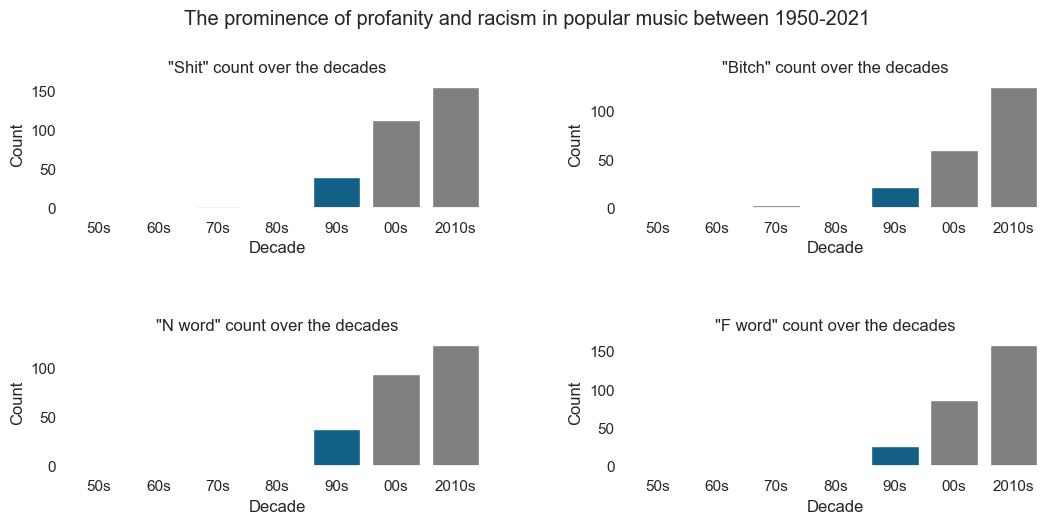

In [338]:
# Barplots for each of the above 

fig, axs = plt.subplots(2 , 2, figsize=(12, 6))
ax1 = sns.barplot(data=df_s, x="Decade", y="Count" , ax=axs[0,0], palette= ['grey' , 'grey', 'grey' , 'grey', '#006699', 'grey', 'grey', 'grey'])
ax2 = sns.barplot(data=df_b, x="Decade", y="Count" , ax=axs[0,1], palette= ['grey' , 'grey', 'grey' , 'grey', '#006699', 'grey', 'grey', 'grey'])
ax3 = sns.barplot(data=df_n, x="Decade", y="Count", ax=axs[1,0], palette= ['grey' , 'grey', 'grey' , 'grey', '#006699', 'grey', 'grey', 'grey'])
ax4 = sns.barplot(data=df_f, x="Decade", y="Count", ax=axs[1,1], palette= ['grey' , 'grey', 'grey' , 'grey', '#006699', 'grey', 'grey', 'grey'])
fig.tight_layout(pad=5.0)
fig.suptitle("The prominence of profanity and racism in popular music between 1950-2021")
ax1.title.set_text("\"Shit\" count over the decades")
ax2.title.set_text("\"Bitch\" count over the decades")
ax3.title.set_text("\"N word\" count over the decades")
ax4.title.set_text("\"F word\" count over the decades")
fig.savefig("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/profanity_racism.png")



# Part 4: Statistical analysis

In [325]:
# This part focuses on looking at how the different music related variables (audio features) behave with each other via scatter plots

# Drop unnecessary columns for the scatter plot 

useless_columns = ["Unnamed: 0" ,'lyrics', 'key' , 'title', 'artist' , 'time_signature', 'year']



df_stat = df[['danceability' , 'energy', 'valence', 'loudness' , 'difficult_words', 'acousticness']]

#sns.pairplot(df_stat)

In [326]:
matrix = df_stat.corr(
    method = 'pearson',  # The method of correlation
    min_periods = 1      # Min number of observations required
).round(2)

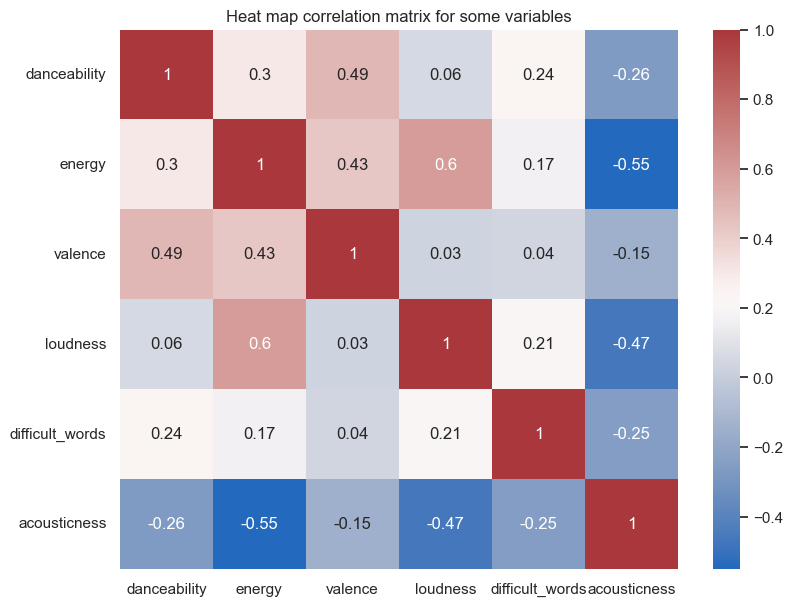

In [327]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.figure(figsize = (9,7))
sns.heatmap(matrix, annot=True , cmap='vlag')
plt.title("Heat map correlation matrix for some variables")
plt.savefig("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/correlation_matrix.png")
plt.show()


In [328]:
# Box plot (Spotify audio features from the heatmap correlation matrix)

df_box_plot = df[['year' , 'acousticness' , 'danceability' , 'energy', 'instrumentalness',
 'liveness', 'loudness' , 'speechiness' ,'valence' , 'difficult_words']]

 # Normalize the features for the box plot 

cols_to_norm = ['acousticness' , 'danceability' , 'energy', 'instrumentalness',
 'liveness', 'loudness' , 'speechiness' ,'valence' , 'difficult_words']

df_box_plot[cols_to_norm] = df_box_plot[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# CReate a decade column, which will be used to group the data by each decade
df_box_plot['decade'] = ''

for i in range(len(df_box_plot)):

    if ((df_box_plot['year'][i] >= 1950) & (df_box_plot['year'][i] < 1960)):
        df_box_plot['decade'][i] = "50s"

    elif ((df_box_plot['year'][i] >= 1960) & (df_box_plot['year'][i] < 1970)):
        df_box_plot['decade'][i] = "60s" 

    elif ((df_box_plot['year'][i] >= 1970) & (df_box_plot['year'][i] < 1980)):
        df_box_plot['decade'][i] = "70s" 

    elif ((df_box_plot['year'][i] >= 1980) & (df_box_plot['year'][i] < 1990)):
        df_box_plot['decade'][i] = "80s" 

    elif ((df_box_plot['year'][i] >= 1990) & (df_box_plot['year'][i] < 2000)):
        df_box_plot['decade'][i] = "90s" 

    elif ((df_box_plot['year'][i] >= 2000) & (df_box_plot['year'][i] < 2010)):
        df_box_plot['decade'][i] = "00s" 

    else:
        df_box_plot['decade'][i] = "2010s"

/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_11931/461539082.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box_plot[cols_to_norm] = df_box_plot[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_11931/461539082.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box_plot['decade'] = ''
/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_11931/461539082.py:19: SettingWithCopyWarning: 
A value is tryi

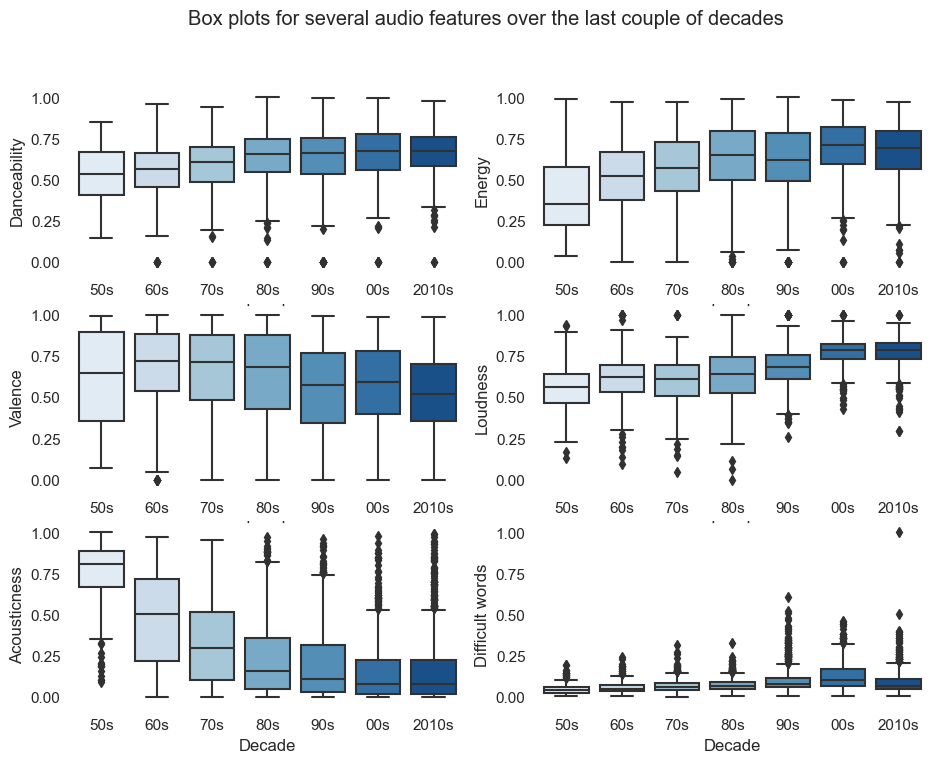

In [344]:
# Create a subplot of boxplots for each variable 

fig, axs = plt.subplots(3 , 2, figsize=(11, 8))
ax1 = sns.boxplot(x = df_box_plot['decade'],
            y = df_box_plot['danceability'],
            palette="Blues",  ax=axs[0,0]).set(ylabel="Danceability")

ax2 = sns.boxplot(x = df_box_plot['decade'],
            y = df_box_plot['energy'],
            palette="Blues" , ax=axs[0,1]).set(ylabel="Energy")

ax3 = sns.boxplot(x = df_box_plot['decade'],
            y = df_box_plot['valence'],
            palette="Blues" , ax=axs[1,0]).set(ylabel="Valence")

ax4 = sns.boxplot(x = df_box_plot['decade'],
            y = df_box_plot['loudness'],
            palette="Blues", ax=axs[1,1]).set(ylabel="Loudness")


ax5 = sns.boxplot(x = df_box_plot['decade'],
            y = df_box_plot['acousticness'],
            palette="Blues", ax=axs[2,0]).set(xlabel = "Decade" , ylabel="Acousticness")

ax6 = sns.boxplot(x = df_box_plot['decade'],
            y = df_box_plot['difficult_words'],
            palette="Blues" , ax=axs[2,1]).set(xlabel = "Decade" , ylabel="Difficult words")

            
fig.suptitle("Box plots for several audio features over the last couple of decades")
fig.savefig("/Users/anthonymoubarak/Desktop/anly-501-project-anthonymoub/501-project-website/Plots/box_plots.png")